In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")
import matplotlib.lines as mlines

C:\Users\alexk\AppData\Local\Temp\ipykernel_25016\849427043.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [4]:
m20_v20_L3_s2=torch.tensor([[[100.0000,  92.8949,  23.1469,  10.0000,   7.5916,  83.0100],
         [100.0000,  86.9565,  49.6907,  26.9231,  32.9670,  94.3100],
         [ 99.9775,  98.0519,  35.4354,  41.6667,  23.5714,  96.5700],
         [ 99.6849,  92.7203,  44.7674,  14.2857,   0.0000,  98.1100],
         [ 99.8974,  89.2045,  50.0000,   0.0000,   4.3478,  99.2200],
         [ 99.7869,  82.8571,  62.8571,   0.0000,   0.0000,  99.4300],
         [ 99.6274,  87.2340,  61.9048,   0.0000,   0.0000,  99.4600],
         [ 99.9098,  78.5714,  33.3333,   0.0000,  50.0000,  99.8300],
         [ 99.8899,  66.6667,  50.0000,   0.0000,   0.0000,  99.8700],
         [ 99.9099,  50.0000,  66.6667,   0.0000,   0.0000,  99.8800]],

        [[100.0000,  80.9358,  47.4156,  28.3761,   8.1059,  59.4500],
         [ 98.9296,  84.5497,  51.9733,  27.5789,   5.7449,  73.4400],
         [ 98.6985,  78.8813,  45.9948,  12.3636,   5.7751,  80.3000],
         [ 97.9643,  70.4498,  46.1648,  19.3277,   7.8704,  87.4600],
         [ 99.0125,  71.5054,  33.9066,  10.2564,  13.9241,  92.4400],
         [ 99.2875,  71.6007,  40.3509,  20.0000,  20.9302,  95.8000],
         [ 99.6115,  75.1462,  37.8641,   7.1429,  11.1111,  97.8500],
         [ 99.7431,  74.5098,  31.4815,   0.0000,  66.6667,  98.7900],
         [ 99.7472,  70.1149,  38.8889,  66.6667,   0.0000,  99.3600],
         [ 99.8190,  76.4706,  80.0000,   0.0000,   0.0000,  99.6900]],

        [[100.0000,  86.5320,  67.2253,  27.3585,   8.4307,  21.0800],
         [ 94.3020,  77.9412,  50.7290,  26.0102,   9.1548,  30.5900],
         [ 92.6829,  66.9308,  38.1731,  17.4658,   8.0481,  38.4600],
         [ 90.3296,  60.9766,  32.7391,  16.8421,  10.9599,  47.8700],
         [ 93.9416,  60.5859,  33.9047,  16.2516,  10.7256,  62.9900],
         [ 96.4310,  63.2387,  33.2790,  16.5198,  12.3153,  76.2200],
         [ 97.6339,  67.1266,  30.7467,  16.4948,  15.0000,  85.9100],
         [ 98.9574,  69.7987,  45.5090,  17.9104,  15.0000,  93.4200],
         [ 99.7193,  78.8927,  44.7552,  33.3333,   0.0000,  97.6200],
         [ 99.8028,  85.3125,  48.7179,  50.0000,   0.0000,  99.1100]],

        [[100.0000,  75.0000,  73.7500,  32.4444,   9.2552,  10.8500],
         [100.0000,  86.3636,  50.9091,  25.7286,   9.7732,  13.4200],
         [ 64.2857,  51.1628,  38.8614,  18.9124,   9.8093,  15.0900],
         [ 72.3404,  45.4082,  26.6976,  14.7218,  10.1927,  18.4300],
         [ 72.8909,  39.0893,  25.6277,  12.5663,  10.4065,  25.1600],
         [ 75.3506,  39.6167,  24.4975,  12.6531,   8.0041,  36.6700],
         [ 87.4021,  52.3952,  27.0035,  16.2847,  12.3377,  59.4400],
         [ 97.6462,  74.2773,  53.7399,  33.0855,  22.7273,  86.8300],
         [ 99.6592,  92.6343,  75.0865,  57.1429,  80.0000,  97.9500],
         [ 99.9475,  96.2175,  89.4737, 100.0000,   0.0000,  99.7300]],

        [[  0.0000,   0.0000,  57.1429,  41.2698,   9.4763,   9.7100],
         [  0.0000, 100.0000,  60.0000,  26.4069,   9.2224,   9.7300],
         [100.0000,  41.6667,  34.4262,  18.3588,   9.5243,  10.5200],
         [ 50.0000,  44.6809,  30.1266,  17.5937,  10.0127,  12.2400],
         [ 58.5714,  37.5000,  23.6994,  15.2880,  10.1599,  14.5700],
         [ 48.5169,  27.3314,  20.7026,  12.2524,  10.7091,  17.6600],
         [ 51.6144,  27.3351,  19.5103,  12.1144,  10.9027,  26.4700],
         [ 94.5665,  73.6673,  56.4581,  36.4542,  33.0097,  79.4500],
         [ 99.8274,  97.4086,  94.0476,  89.3617, 100.0000,  99.2200],
         [ 99.9691,  98.9399, 100.0000,   0.0000,   0.0000,  99.9400]],

        [[  0.0000,   0.0000, 100.0000,  25.0000,   9.4823,   9.5100],
         [  0.0000,   0.0000, 100.0000,  34.6939,  10.2412,  10.3700],
         [  0.0000,   0.0000,  33.3333,  18.7500,  10.2538,  10.3900],
         [  0.0000, 100.0000,  47.3684,  21.0856,  10.6936,  11.2700],
         [  0.0000,  50.0000,  36.6667,  15.9786,  10.5834,  11.6100],
         [  0.0000,  26.6667,  19.2481,  12.9243,  10.3827,  11.8700],
         [ 29.0076,  14.7186,  14.0561,  12.3619,  10.3286,  12.8600],
         [ 19.4776,  17.9361,  15.7554,  14.2037,  10.7143,  17.4900],
         [ 99.9023, 100.0000, 100.0000,   0.0000,   0.0000,  99.9100],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])
m10_v20_L3_s2=torch.tensor([[[100.0000,  96.5364,  56.8047,  48.7179,  13.0952,  93.5700],
         [ 99.9761,  99.1239,  65.0320,  31.5789,   8.2857,  94.9300],
         [ 99.9771,  92.2865,  54.8077,  23.0769,   5.9908,  95.8700],
         [ 99.7152,  90.3683,  68.4615,   0.0000,  20.0000,  98.6900],
         [ 99.8051,  91.1392,  65.7534,  50.0000,   5.5556,  99.2400],
         [ 99.7971,  91.8605,  59.5745,   0.0000,   0.0000,  99.4600],
         [ 99.9095,  88.8889,  53.8462,   0.0000,   0.0000,  99.8000],
         [ 99.8194,  69.5652,  50.0000,   0.0000,   0.0000,  99.6800],
         [ 99.8799,  87.5000,  33.3333,   0.0000,   0.0000,  99.8400],
         [ 99.9099, 100.0000,   0.0000,   0.0000,   0.0000,  99.9000]],

        [[100.0000,  93.6946,  70.0178,  39.2535,  30.0889,  69.9500],
         [ 99.6378,  89.4447,  52.8990,  27.9343,   3.3419,  74.6600],
         [ 98.6190,  82.1520,  49.9042,  25.5814,   3.6765,  84.8600],
         [ 98.5379,  77.9480,  43.7318,   9.3458,  18.3267,  88.7200],
         [ 99.3832,  76.7762,  37.4286,  18.5185,   3.3333,  94.0700],
         [ 99.3013,  71.1297,  34.8837,  25.0000,   4.3478,  96.4500],
         [ 99.5949,  78.7986,  34.6667,  15.3846,   0.0000,  98.3900],
         [ 99.7761,  76.6423,  31.4286,  50.0000,   0.0000,  99.2000],
         [ 99.8184,  69.2308,  26.3158,   0.0000,   0.0000,  99.4600],
         [ 99.7895,  66.6667,  50.0000,   0.0000,   0.0000,  99.7100]],

        [[100.0000,  78.4672,  46.2076,  21.1119,   6.3628,  14.8200],
         [ 98.0357,  79.8584,  51.4224,  23.9558,  11.4179,  36.8600],
         [ 94.2980,  70.5936,  43.4323,  22.3594,  13.0887,  49.6900],
         [ 92.1481,  60.7609,  36.0861,  18.5410,  11.1979,  59.0500],
         [ 96.6393,  67.0674,  39.0000,  17.8309,  13.7339,  76.0400],
         [ 97.6082,  70.0427,  38.9302,  17.8010,  18.1818,  87.1800],
         [ 98.8726,  71.3348,  45.2107,  21.2121,  45.4545,  94.6400],
         [ 99.4009,  77.1635,  50.0000,  60.0000,   0.0000,  98.1300],
         [ 99.8573,  84.0909,  57.1429,   0.0000,   0.0000,  99.5100],
         [ 99.8995,  81.6327, 100.0000,   0.0000,   0.0000,  99.8100]],

        [[100.0000, 100.0000,  73.2673,  42.6518,  12.6565,  15.1900],
         [100.0000,  81.6514,  53.6810,  24.6788,   9.4596,  16.1900],
         [ 84.6890,  61.5085,  38.4698,  19.2982,  10.3213,  23.3900],
         [ 84.9724,  52.8202,  32.9833,  17.2485,  10.5546,  31.8600],
         [ 84.7271,  52.2609,  29.0379,  15.7414,  12.8947,  47.9000],
         [ 93.6186,  60.7143,  35.2316,  21.4876,   9.4828,  73.1700],
         [ 97.8104,  76.0925,  47.5664,  27.2727,  21.4286,  91.5100],
         [ 99.3918,  87.3394,  65.7895,  71.4286,   0.0000,  98.4600],
         [ 99.8584,  86.2385, 100.0000,   0.0000,   0.0000,  99.7100],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000, 100.0000,  85.1064,  43.0730,  10.1015,  11.7900],
         [100.0000, 100.0000,  56.8493,  28.2492,  10.7584,  13.1400],
         [ 85.7143,  50.0000,  34.5566,  19.7608,  10.8562,  14.7400],
         [ 64.8045,  43.0727,  29.2865,  16.1377,   9.6896,  18.7200],
         [ 67.4100,  43.2277,  27.7348,  16.8521,  12.6233,  30.5500],
         [ 81.0255,  53.0128,  36.9231,  25.1225,  21.3333,  58.3000],
         [ 96.6289,  82.2323,  66.0377,  46.2500,  25.0000,  92.2100],
         [ 99.6057,  91.9881,  80.0000,   0.0000,   0.0000,  99.3000],
         [ 99.9499, 100.0000,   0.0000,   0.0000,   0.0000,  99.9500],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,  60.0000,  27.5510,   9.2957,   9.5000],
         [  0.0000, 100.0000,  47.8261,  25.5376,   9.2566,   9.9600],
         [100.0000,  50.0000,  39.6040,  19.3986,   9.4550,  10.8100],
         [ 75.0000,  62.5000,  36.5455,  19.5131,   9.6617,  14.0100],
         [ 60.6061,  36.3636,  22.7821,  14.5003,   9.0613,  16.6300],
         [ 47.9529,  32.9491,  20.6416,  14.3922,  14.5923,  28.9100],
         [ 95.0083,  86.2745,  75.4098,   0.0000,   0.0000,  93.4300],
         [ 99.9900, 100.0000,   0.0000,   0.0000,   0.0000,  99.9900],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])
m10_v10_L3_s2=torch.tensor([[[100.0000,  50.2240,  55.2925,  27.9070,  12.5698,  84.1500],
         [100.0000,  88.0473,  59.5528,  45.8333,   2.3973,  94.0200],
         [ 99.9326,  88.4615,  51.6035,  35.7143,   2.1429,  96.1300],
         [ 99.8330,  90.3346,  56.5789,   0.0000,   9.7222,  98.5900],
         [ 99.9079,  79.8701,  62.5000,   0.0000,  11.1111,  99.1700],
         [ 99.7767,  84.0909,  43.9024,   0.0000,  17.6471,  99.2600],
         [ 99.8492,  80.5556,  37.5000,   0.0000,   0.0000,  99.6400],
         [ 99.8996,  82.8571,  42.8571,   0.0000,   0.0000,  99.7700],
         [ 99.9399, 100.0000,  25.0000,   0.0000,   0.0000,  99.9100],
         [ 99.9800,  50.0000,  50.0000,   0.0000,   0.0000,  99.9600]],

        [[100.0000,  76.7155,  50.6164,  28.6389,   7.4924,  50.2600],
         [ 99.6552,  72.8187,  39.4311,  22.2433,   3.7915,  70.0200],
         [ 97.9673,  76.9651,  39.1263,  24.3902,   5.8728,  80.7700],
         [ 98.6842,  66.5714,  33.2278,  12.6437,   9.2683,  87.4700],
         [ 99.3905,  71.4789,  40.4624,   9.6774,  15.5556,  94.0400],
         [ 99.4857,  70.5021,  38.7755,  28.5714,   9.5238,  96.8700],
         [ 99.7000,  72.9323,  40.9836,  25.0000,   0.0000,  98.5700],
         [ 99.8478,  77.1186,  48.0000,  33.3333,   0.0000,  99.4300],
         [ 99.8591,  64.8148,  40.0000,   0.0000,   0.0000,  99.6000],
         [ 99.9097,  54.8387,  50.0000,   0.0000,   0.0000,  99.7600]],

        [[ 98.4615,  83.6120,  52.0920,  28.0114,   8.8498,  18.4900],
         [ 93.7908,  68.4488,  42.2410,  25.1518,   9.7523,  33.0400],
         [ 92.3793,  62.0772,  40.8293,  19.6885,   8.3156,  44.2500],
         [ 87.8771,  56.2011,  33.3987,  17.3733,   6.9182,  55.0100],
         [ 96.7564,  67.1769,  34.3122,  15.9615,   9.4170,  75.5700],
         [ 98.3755,  68.5854,  40.5145,  15.5689,  20.5882,  88.0000],
         [ 99.2774,  80.8884,  45.3488,  32.6531,  16.6667,  95.7300],
         [ 99.8318,  89.2944,  64.1791,  50.0000, 100.0000,  99.1300],
         [ 99.9083,  90.3030,  62.5000,   0.0000,   0.0000,  99.6900],
         [100.0000,  91.3043, 100.0000,   0.0000,   0.0000,  99.9600]],

        [[100.0000,  86.2069,  54.5455,  26.0870,   9.2222,  11.7000],
         [ 80.0000,  66.4179,  39.6440,  19.9278,  10.5854,  14.8200],
         [ 76.9231,  41.0999,  25.0700,  14.4528,   8.8242,  16.6000],
         [ 62.3295,  38.6364,  24.0487,  14.2317,   9.9132,  24.9600],
         [ 76.3617,  41.7076,  24.8824,  12.5264,   9.1907,  41.1800],
         [ 93.0728,  65.5200,  39.3707,  25.9912,  16.8142,  75.2800],
         [ 99.5882,  91.1867,  74.7788,  56.3218,  71.4286,  96.8600],
         [ 99.8833,  95.7661,  85.2941, 100.0000,   0.0000,  99.5700],
         [ 99.9798, 100.0000, 100.0000,   0.0000,   0.0000,  99.9800],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000, 100.0000,  76.0000,  35.6209,   9.6844,  10.6800],
         [  0.0000,  83.3333,  43.8462,  21.8293,   9.7855,  11.2600],
         [ 72.7273,  53.1250,  34.6975,  18.5326,  10.5780,  14.0800],
         [ 71.3287,  44.3878,  27.9933,  16.2528,  10.3440,  18.1900],
         [ 55.4622,  34.0543,  22.5148,  14.0973,   9.7030,  24.9600],
         [ 81.8204,  55.6401,  37.9310,  25.3769,  16.9231,  59.6200],
         [ 99.5604,  95.1373,  87.1332,  72.3077,  66.6667,  98.0300],
         [ 99.9896,  99.7076,  96.4286, 100.0000,   0.0000,  99.9700],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[  0.0000,   0.0000,  70.0000,  28.8136,   9.9980,  10.2800],
         [  0.0000,   0.0000,  52.9412,  24.9284,   9.3004,   9.9200],
         [  0.0000,  75.0000,  31.1321,  17.0408,  10.2806,  11.1900],
         [  0.0000,  44.4444,  31.6981,  15.1849,   9.3409,  12.2000],
         [ 37.8378,  27.2588,  17.8539,  11.8952,   9.7830,  13.7600],
         [ 29.2906,  21.0425,  15.1331,  11.7236,   9.5890,  19.1900],
         [ 99.5022,  98.6197,  99.0826,  80.0000,   0.0000,  99.3600],
         [100.0000, 100.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



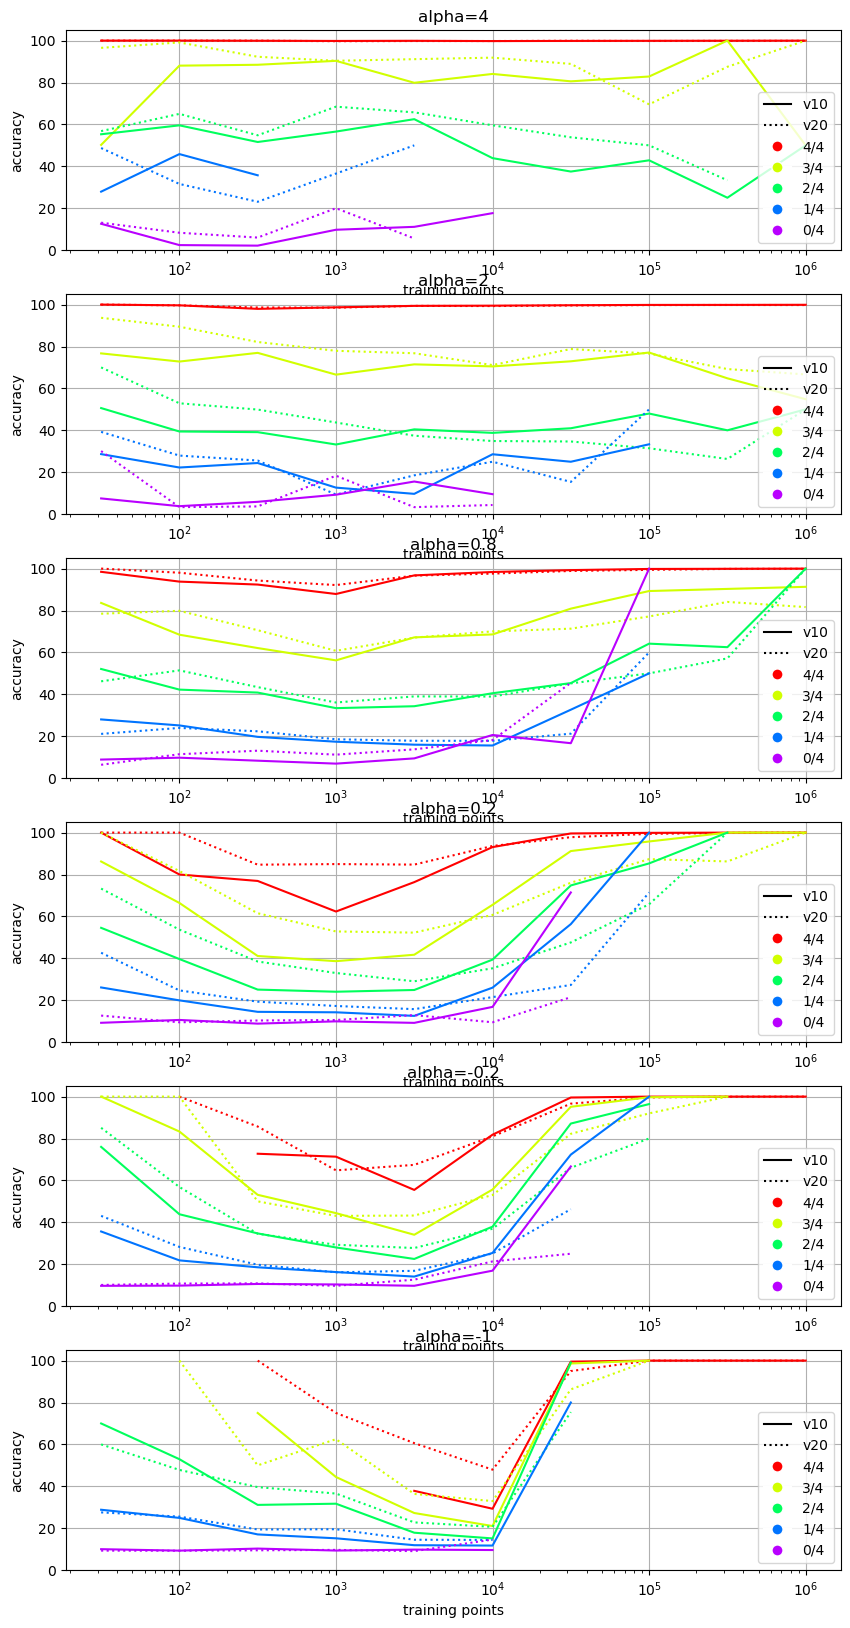

In [15]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4","1/4","0/4"]
for j in range(6):
    for i in range(5):
        data = m20_v20_L3_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        # axis[j].semilogx(ptr_list[non_zero_indices]/8, data[non_zero_indices], color=colormap(i/5), label=title_list[i],linestyle="dashdot")
        data2 = m10_v20_L3_s2[j, :, i].numpy()
        non_zero_indices = np.where(data2 != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data2[non_zero_indices], color=colormap(i/5), linestyle="dotted",label=title_list[i])
        data3= m10_v10_L3_s2[j, :, i].numpy()
        non_zero_indices = np.where(data3 != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data3[non_zero_indices], color=colormap(i/5), linestyle="solid")
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    
    



    color_legend = [
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(3/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(4/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(5/5), markersize=8),
    ]

    # color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
    color_labels=title_list
    linestyle_legend = [
        mlines.Line2D([0], [0], linestyle="solid", color='black'),
            # plt.Line2D([0], [0], linestyle="dashdot", color='black'),
        mlines.Line2D([0], [0], linestyle="dotted", color='black'),
        ]
    linestyle_labels = ["v10", "v20"]

    # Merge legends
    all_handles = linestyle_legend + color_legend
    all_labels = linestyle_labels + color_labels

    # Add legends
    axis[j].legend(all_handles, all_labels, loc='lower right')
    axis[j].grid(True)

